### Time Series Data

- Time Series Basicsa
- Statsmodels
- ETS Models
- EWMA Models
- ARIMA Models

Trends 
- Upward
- Stationary
- Downward

Seasonality - Repeating Trends
Cyclical - Trends with no set reptition.
Secular - ongoing outside of trend

### ETS Model
(Error-Trend-Seasonality)
- Exponential Smoothing
- Trend Methods Modes
- ETS Decomposition

Exponetial Weighted Moving Average Models (EWMA)!

SMA dont inform you about future behavior, only trends in data.
Extreme values can skew SMA values
Always lags by size of the window


Models will take each term for smooth purposes omit, add, multiple them!
Based off these key factos we can create a model to fit our data.


### ARIMA Models

Autoregressive Integrated Moving Average
(various reasons ARIMA, dont work well for historical stock/security data)

ARIMA models are applied in some cases where data show evidence of non-stationarity 
where an initial differencing step (corresponding to the "integrated" part of the model)
can be applied one or more times to eliminate the non-stationarity.

ARIMA(p,d,q)
AR (p) Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.

I (d) Integrated - Differencing of observations (subtracting an observation from an observation at the previosu time step) in order to make the time series stationary.

MA (q) Moving Average - a model that sues the dependency between an observation and a rsidenal error from a moving avaerage model applied to a lagged observations.

What makes a data set Stationary - has constant mean and variance over time. Allow our mkodel to predict will be the same over time.
- constant mean
- constant variance (not a function of time)
- co-variance should not be a function of time

(yea def not securities lol)

Test for stationarity Augmented Dickey-Fuller Test

if data is not stationary, you will need to transform it via 'differencing'


### ACF and PACF
Auto Correlation
Parital Auto-Correlation

An auto-correlation plot (also known as a Correlogram) shows the correlation of the series with itself, lagged by x time units.

So the y axis is the correlation and the x axis is the number of time units of lag

p: The number of lag observations included in the model
d: the number of times that the raw observations are differenced
q: The size of the moving average window, also called the order of moving average

Partical correlation is a conditional correlation

which y = response variable 
x1,x2,x3 are predictor variables

The partial correlation between y and x3 is the correlation between the variables determined 

Time Series Decomposition witih ETS
Visualizing the data based off its ETS is a good way to build an understanding

AR-K model

Identification of AR model is best done with PACF

Partial Autocorrelation Function

Identification of a MA model is best done wtih ACF

Autocorrelation funciton

Then you can apply ARIMA or Seasonal ARIMA
(P,D,Q) + seasonal related terms.


## What is Stationary ?

In mathematics and statistics, a stationary process (or a strict/strictly stationary process or strong/strongly stationary process) is a stochastic process whose unconditional joint probability distribution does not change when shifted in time.[1] Consequently, parameters such as mean and variance also do not change over time. If you draw a line through the middle of a stationary process then it should be flat; it may have 'seasonal' cycles, but overall it does not trend up nor down.

Since stationarity is an assumption underlying many statistical procedures used in time series analysis, non-stationary data are often transformed to become stationary. The most common cause of violation of stationarity is a trend in the mean, which can be due either to the presence of a unit root or of a deterministic trend. In the former case of a unit root, stochastic shocks have permanent effects, and the process is not mean-reverting. In the latter case of a deterministic trend, the process is called a trend-stationary process, and stochastic shocks have only transitory effects after which the variable tends toward a deterministically evolving (non-constant) mean.

Standard deviation is the square root of the variance.

Geometric random walk - Wiener Process & Random Walk (log noraml distributions)


Statsmodel - inspired by R!
https://www.statsmodels.org/stable/index.html

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm

In [6]:
df = sm.datasets.macrodata.load_pandas().data

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [8]:
eth_df =pd.read_csv("./data/eth.csv", index_col='Date', parse_dates=True)
eth_df = eth_df.iloc[::-1]
eth_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-29,476.675484,524.356285,427.233001,427.233001,1.497273e+09,4.593803e+10
2017-11-30,431.505862,465.240587,403.099585,447.889008,1.803252e+09,4.209423e+10
2017-12-01,446.687467,473.461463,428.973482,465.688648,1.071947e+09,4.307045e+10
2017-12-02,466.701873,477.328305,457.965814,465.195692,8.105988e+08,4.501313e+10
2017-12-03,465.176425,482.885385,453.236437,466.483835,6.057337e+08,4.525139e+10


In [14]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [15]:
df.index = index

In [16]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


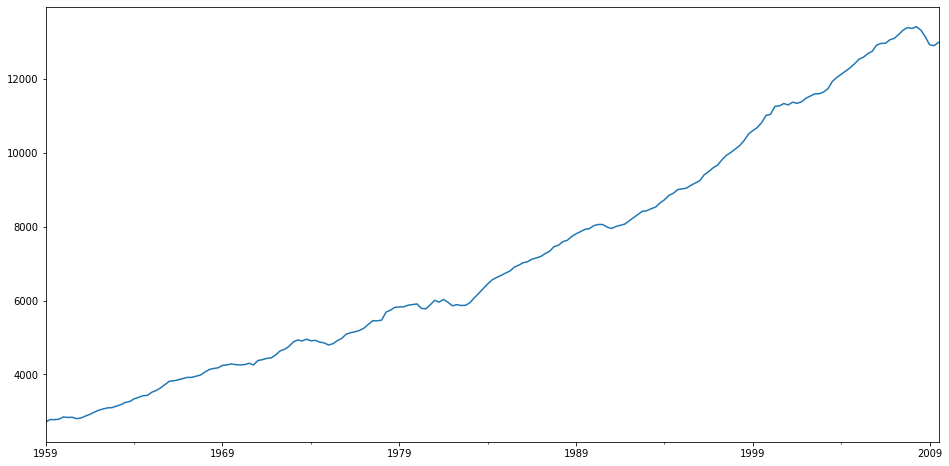

In [18]:
df['realgdp'].plot(figsize=(16,8));

In [19]:
result = sm.tsa.filters.hpfilter(df['realgdp'])

In [20]:
type(result)

tuple

In [21]:
result[0]

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [22]:
type(result[1])

pandas.core.series.Series

In [23]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [42]:
df['trend'] = gdp_trend
df['trend ma'] = gdp_trend.rolling(window=10).mean()
df['trend ema'] = gdp_trend.ewm(span=10,adjust=False).mean()

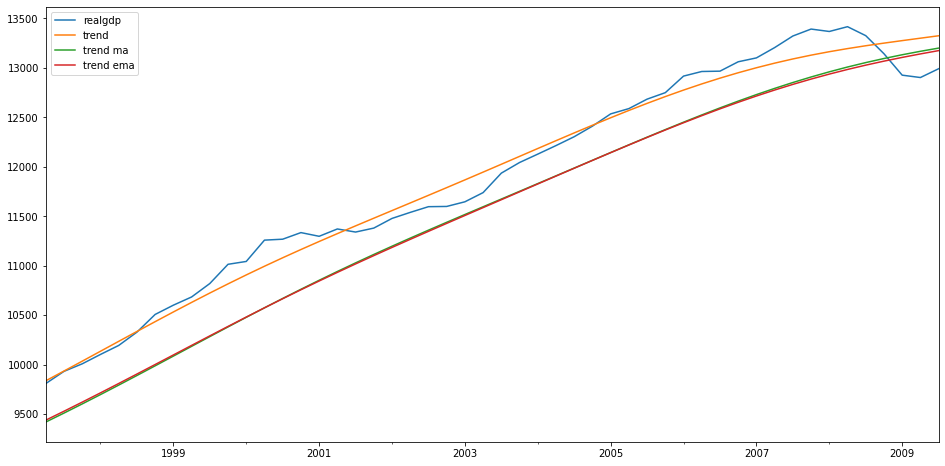

In [45]:
df[['realgdp','trend','trend ma','trend ema']].tail(50).plot(figsize=(16,8));

In [48]:
# EWMA Code Along
airline = pd.read_csv('./data/airline_passengers.csv',index_col="Month",parse_dates=True)

In [51]:
airline.dropna(inplace=True)

In [52]:
airline.index = pd.to_datetime(airline.index)

In [53]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [54]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [55]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [56]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

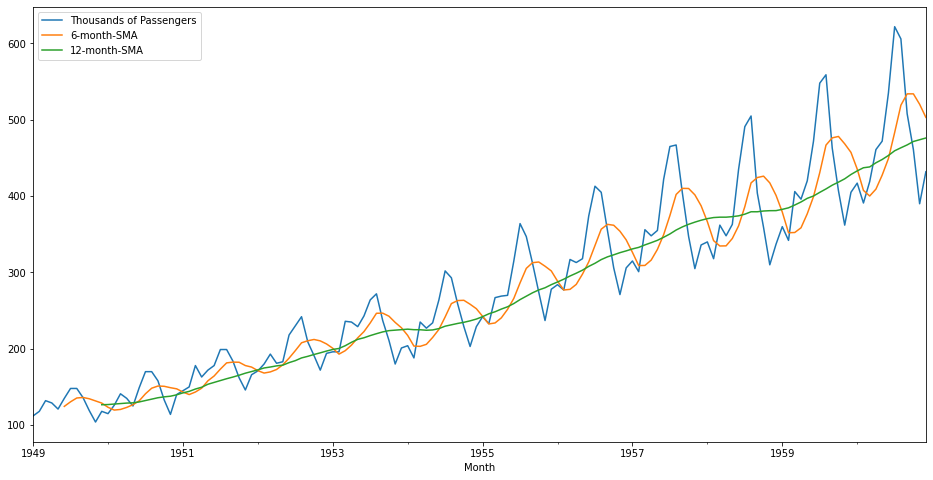

In [58]:
airline.plot(figsize=(16,8));

In [61]:
airline['EWMA-6'] = airline['Thousands of Passengers'].ewm(span=6).mean()
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

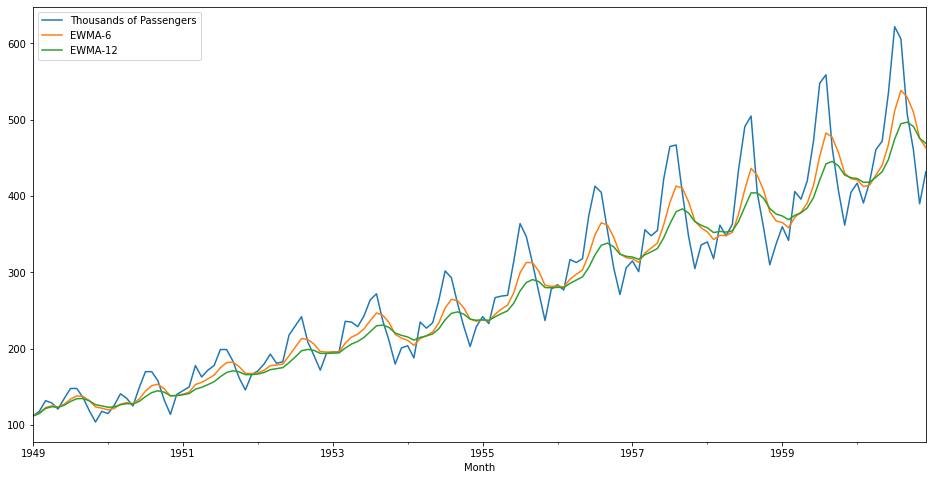

In [63]:
airline[['Thousands of Passengers','EWMA-6','EWMA-12']].plot(figsize=(16,8));

In [64]:
# ETS Code Along
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
result = seasonal_decompose(airline['Thousands of Passengers'])

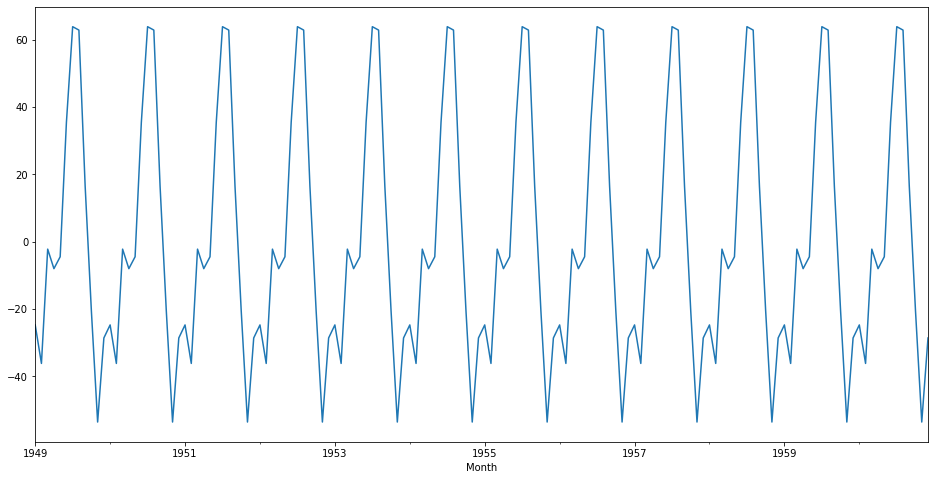

In [71]:
result.seasonal.plot(figsize=(16,8));

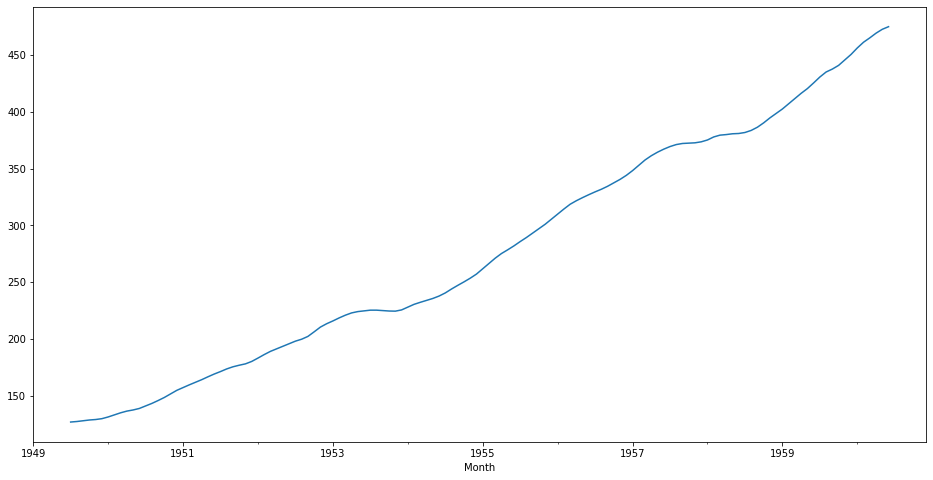

In [70]:
result.trend.plot(figsize=(16,8));

In [72]:
btc_df =pd.read_csv("./data/btc.csv", index_col='Date', parse_dates=True)
btc_df = btc_df.iloc[::-1]
btc_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-12-01,10215.701154,11026.034875,9685.536843,10967.664817,6.944962e+09,1.728031e+11
2017-12-02,10957.085129,11336.667287,10864.034387,11052.132885,5.508931e+09,1.854632e+11
2017-12-03,11048.835144,11823.201254,10842.238447,11304.617026,4.439198e+09,1.907835e+11
2017-12-04,11318.919770,11645.096036,11073.096941,11645.096036,5.876344e+09,1.911742e+11
2017-12-05,11665.227600,11985.214862,11595.802604,11896.907905,5.704205e+09,1.977411e+11


In [73]:
btc_result = seasonal_decompose(btc_df['Close'])

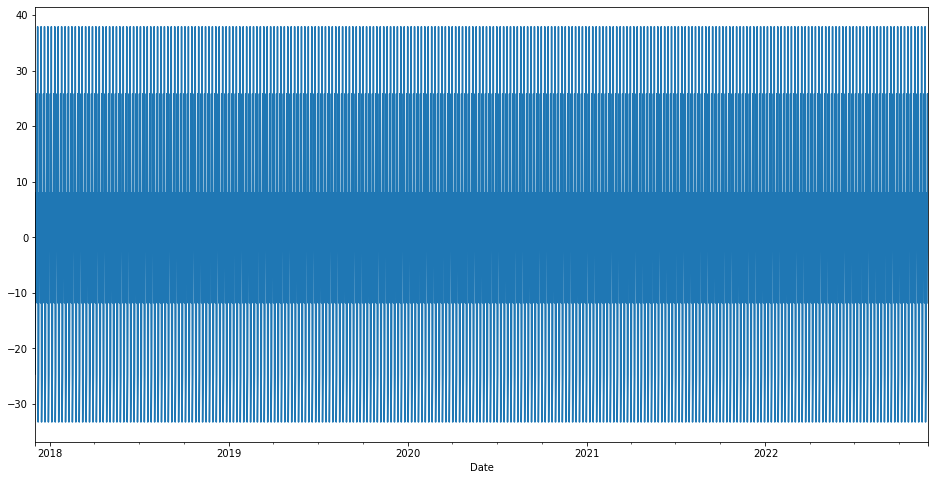

In [74]:
btc_result.seasonal.plot(figsize=(16,8));

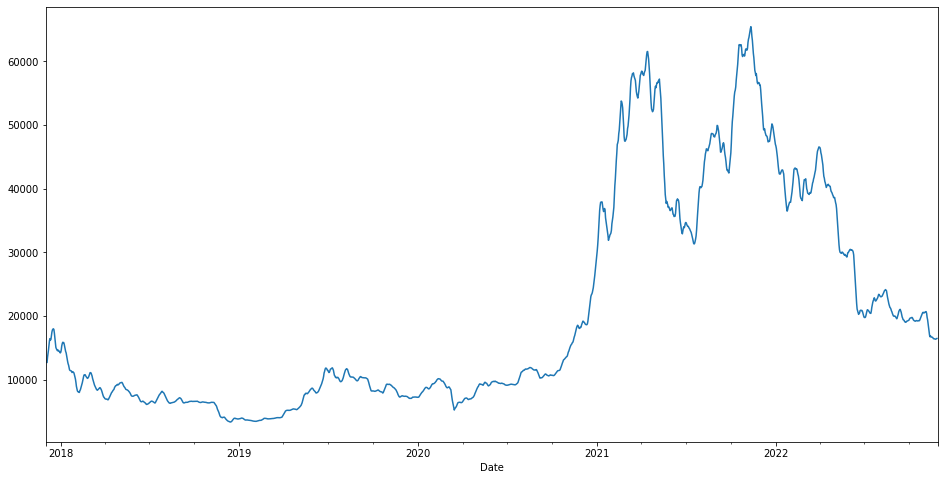

In [75]:
btc_result.trend.plot(figsize=(16,8));

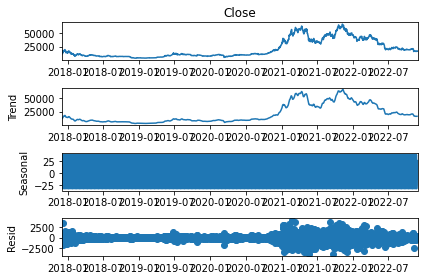

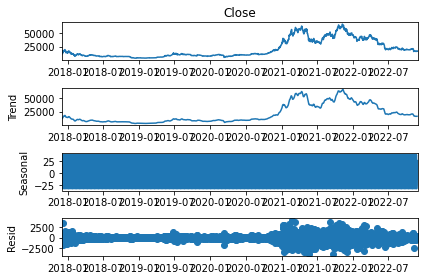

In [77]:
btc_result.plot()

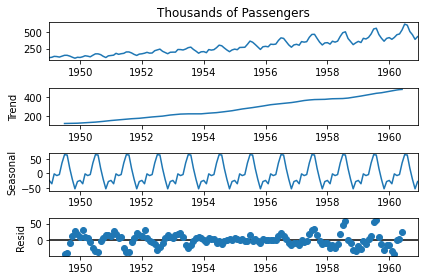

In [114]:
result.plot();

In [80]:
# ARIMA Theory
# AutoCorrleation Plots (ACF)
# Partial Auto-Corrleation Plots (P-ACF)
# Gradual Decline
# Sharp Drop-Off
# AR Auto-regressive, MA Moving Average, How many lags or 'differencing step'

In [98]:
df = pd.read_csv('./data/monthly-milk-production-pounds-p.csv',index_col='Month',parse_dates=True)
df.columns = ['Milk in Pounds Per Cow']
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,Milk in Pounds Per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Milk in Pounds Per Cow  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


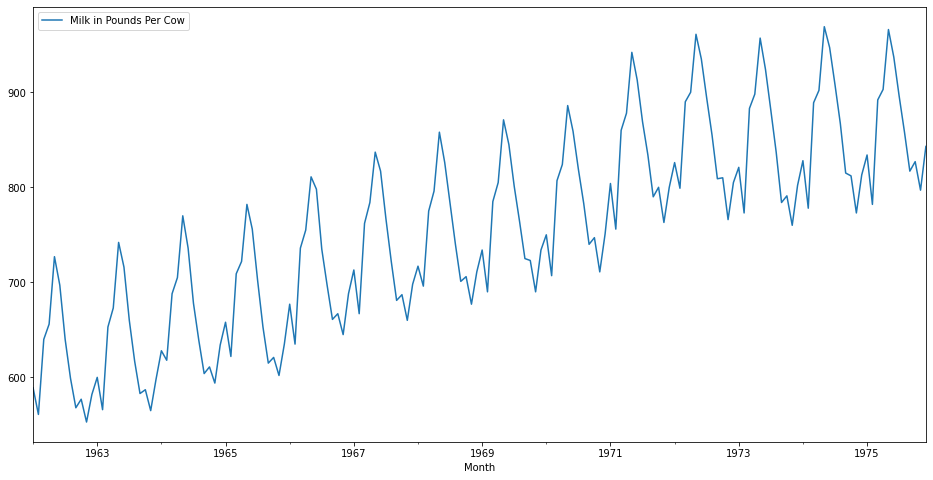

In [101]:
df.plot(figsize=(16,8));

In [102]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds Per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [104]:
btc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1825.0,2.029283e+04,1.699215e+04,3.239810e+03,7.687676e+03,1.093066e+04,3.369117e+04,6.751092e+04
High,1825.0,2.081114e+04,1.743073e+04,3.269710e+03,7.913658e+03,1.122455e+04,3.481822e+04,6.876996e+04
Low,1825.0,1.971355e+04,1.649697e+04,3.188543e+03,7.492217e+03,1.064497e+04,3.227267e+04,6.635893e+04
Close,1825.0,2.029805e+04,1.699315e+04,3.236701e+03,7.684932e+03,1.092977e+04,3.384601e+04,6.750002e+04
Volume,1825.0,4.081643e+10,3.676111e+10,2.039620e+09,1.094344e+10,2.933448e+10,6.361855e+10,2.121515e+11
Market Cap,1825.0,3.768099e+11,3.229870e+11,5.632816e+10,1.357112e+11,1.961957e+11,6.319405e+11,1.273518e+12


In [105]:
type(df['Milk in Pounds Per Cow'])

pandas.core.series.Series

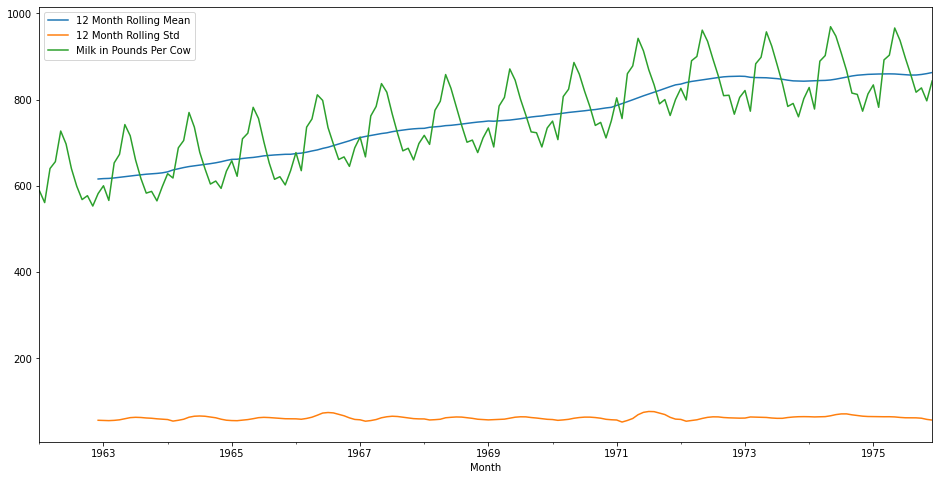

In [111]:
df['Milk in Pounds Per Cow'].rolling(12).mean().plot(label='12 Month Rolling Mean', figsize=(16,8));
df['Milk in Pounds Per Cow'].rolling(12).std().plot(label='12 Month Rolling Std', figsize=(16,8));
df['Milk in Pounds Per Cow'].plot();
plt.legend();

In [118]:
# ETS Decomposition
decomp = seasonal_decompose(df['Milk in Pounds Per Cow'],period=12);

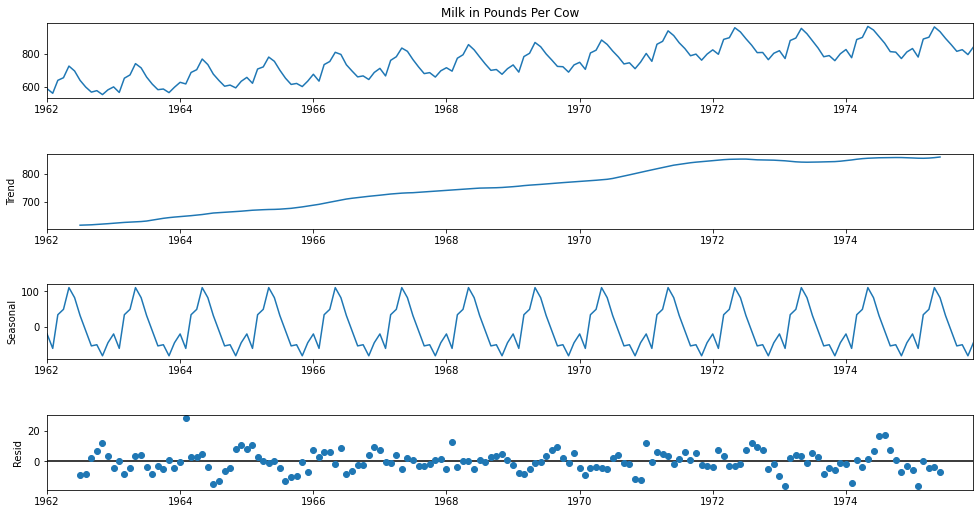

In [119]:
fig = decomp.plot();
fig.set_size_inches(15,8);

In [120]:
# lets test for stationarity
# (at the 10:27 mark)I accidentally used an = sign instead of a minus sign!
# ARIMA Code Along Part 2

In [121]:
df.head()

,Milk in Pounds Per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [124]:
# is this data stationary or non-stationary
# Dicky-Fuller Null Hypothesis, 
# No unit root and is stationary

#What Is a Null Hypothesis?
#A null hypothesis is a type of statistical hypothesis that proposes that 
#no statistical significance exists in a set of given observations. 

#Hypothesis testing is used to assess the credibility of a hypothesis by using sample data. 
#Sometimes referred to simply as the "null," it is represented as H0.

#The null hypothesis, also known as the conjecture, is used in quantitative analysis to test theories 
#about markets, investing strategies, or economies to decide if an idea is true or false.
# https://www.investopedia.com/terms/n/null_hypothesis.asp

In [126]:
from statsmodels.tsa.stattools import adfuller

In [128]:
ad_result = adfuller(df['Milk in Pounds Per Cow'])

In [131]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels= ['ADF Test Statistic', 'p-Value', '# of lags','Num of Observations']
    
    for value, label in zip(result, labels):
        print(label + " : " + str(value))
    if result[1] <= 0.05:
        print("strong evidence against null hypothesis (rejected)")
        print("Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis (accepted or fail to reject)")
        print("Data does have a unit root and is not stationary")
        

In [132]:
adf_check(btc_df['Close'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.3393991386983068
p-Value : 0.6109600477123629
# of lags : 24
Num of Observations : 1800
weak evidence against null hypothesis (accepted or fail to reject)
Data does have a unit root and is not stationary


In [133]:
adf_check(df['Milk in Pounds Per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.303811587422122
p-Value : 0.627426708603035
# of lags : 13
Num of Observations : 154
weak evidence against null hypothesis (accepted or fail to reject)
Data does have a unit root and is not stationary


In [134]:
adf_check(eth_df['Open'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.2912833987271375
p-Value : 0.6331506742137518
# of lags : 19
Num of Observations : 1806
weak evidence against null hypothesis (accepted or fail to reject)
Data does have a unit root and is not stationary


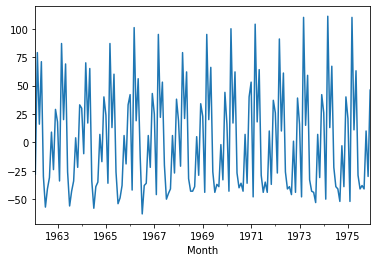

In [137]:
df['First Difference'] = df['Milk in Pounds Per Cow'] - df['Milk in Pounds Per Cow'].shift(1)
df['First Difference'].dropna(inplace=True)
df['First Difference'].plot();

In [138]:
adf_check(df['First Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.0549955586530677
p-Value : 0.03006800400178584
# of lags : 14
Num of Observations : 152
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


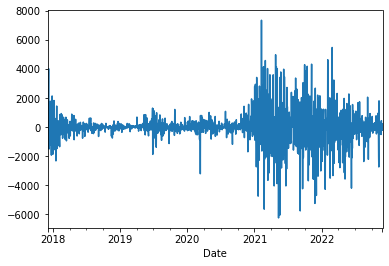

In [139]:
btc_df['First Difference'] = btc_df['Close'] - btc_df['Close'].shift(1)
btc_df['First Difference'].dropna(inplace=True)
btc_df['First Difference'].plot();

In [140]:
adf_check(btc_df['First Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -8.389819769293917
p-Value : 2.3833671391652316e-13
# of lags : 23
Num of Observations : 1800
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


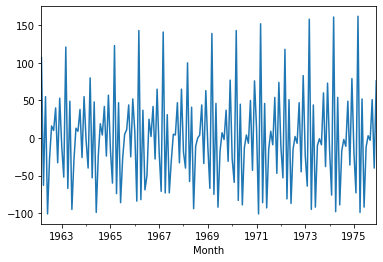

In [141]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)
df['Second Difference'].dropna(inplace=True)
df['Second Difference'].plot();

In [142]:
adf_check(df['Second Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.327873645603376
p-Value : 1.112698933208163e-26
# of lags : 11
Num of Observations : 154
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


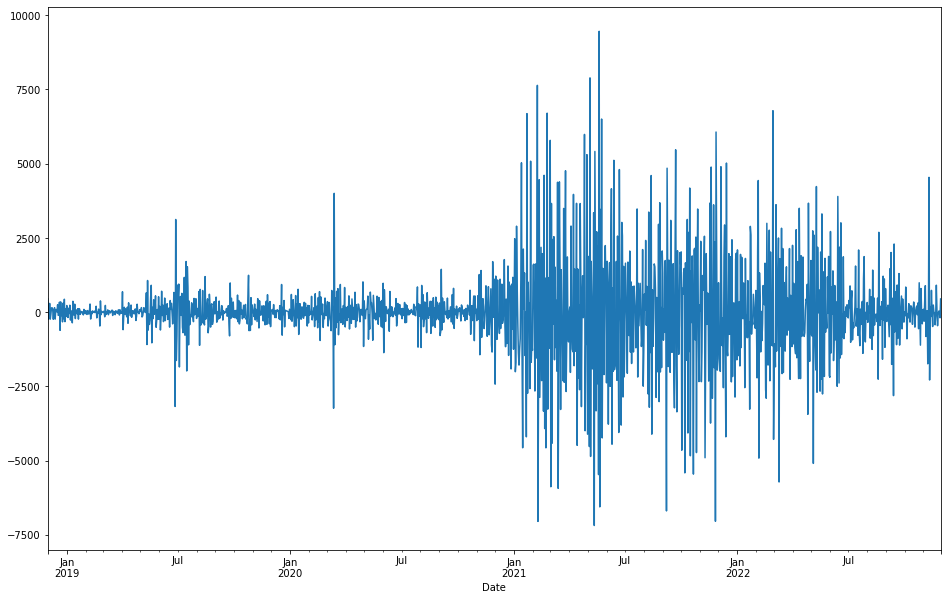

In [149]:
btc_df['Second Difference'] = btc_df['First Difference'] - btc_df['First Difference'].shift(1)
btc_df['Second Difference'].dropna(inplace=True)
btc_df['Second Difference'].tail(4*365).plot(figsize=(16,10));

In [144]:
adf_check(btc_df['Second Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -15.66102748761347
p-Value : 1.5539342463414133e-28
# of lags : 25
Num of Observations : 1797
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


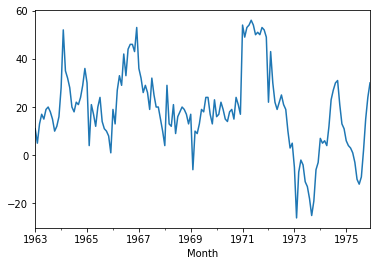

In [150]:
df['Seasonal First Difference'] = df['Milk in Pounds Per Cow'] - df['Milk in Pounds Per Cow'].shift(12)
df['Seasonal First Difference'].dropna(inplace=True)
df['Seasonal First Difference'].plot();

In [157]:
adf_check(df['Seasonal First Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.6369264056008337
p-Value : 0.08560293118048617
# of lags : 12
Num of Observations : 131
weak evidence against null hypothesis (accepted or fail to reject)
Data does have a unit root and is not stationary


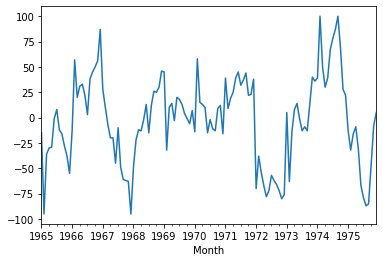

In [158]:
df['Seasonal Second Difference'] = df['Seasonal First Difference'] - df['Seasonal First Difference'].shift(12)
df['Seasonal Second Difference'].dropna(inplace=True)
df['Seasonal Second Difference'].plot();

In [159]:
adf_check(df['Seasonal Second Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.9268463611348468
p-Value : 0.04231401519178877
# of lags : 12
Num of Observations : 119
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


In [160]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

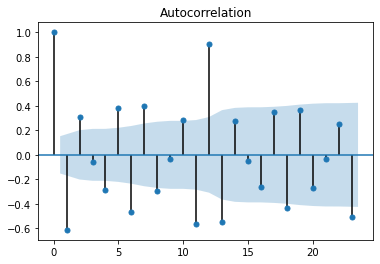

In [165]:
fig_first = plot_acf(df['Second Difference'].dropna())

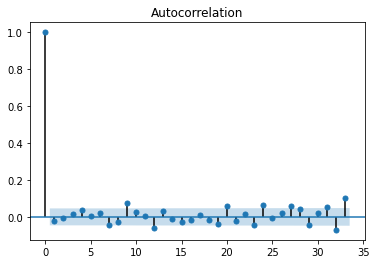

In [163]:
fig_first = plot_acf(btc_df['First Difference'].dropna())

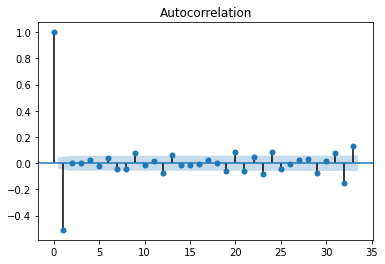

In [164]:
fig_first = plot_acf(btc_df['Second Difference'].dropna())

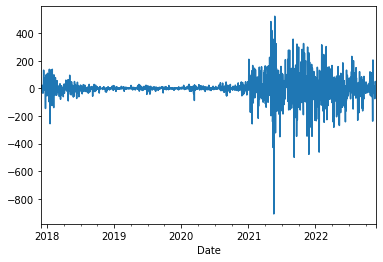

In [167]:
eth_df['First Difference'] = eth_df['Close'] - eth_df['Close'].shift(1)
eth_df['First Difference'].dropna(inplace=True)
eth_df['First Difference'].plot();

In [168]:
adf_check(eth_df['First Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -10.63030440841158
p-Value : 5.235252065532291e-19
# of lags : 16
Num of Observations : 1808
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


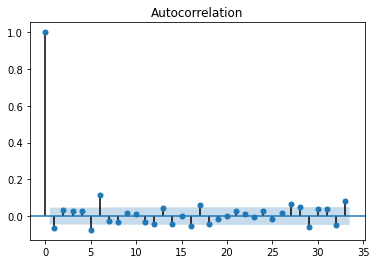

In [169]:
fig_first = plot_acf(eth_df['First Difference'].dropna());

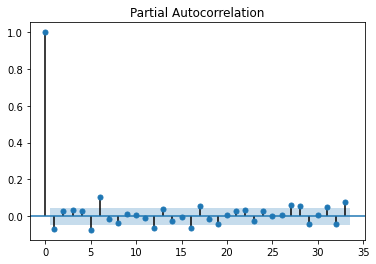

In [173]:
plot_pacf(eth_df['First Difference'].dropna());

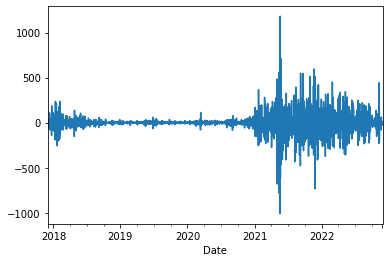

In [170]:
eth_df['Second Difference'] = eth_df['First Difference'] - eth_df['First Difference'].shift(1)
eth_df['Second Difference'].dropna(inplace=True)
eth_df['Second Difference'].plot();

In [171]:
adf_check(eth_df['Second Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -15.729329086632541
p-Value : 1.2951544732869947e-28
# of lags : 25
Num of Observations : 1798
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


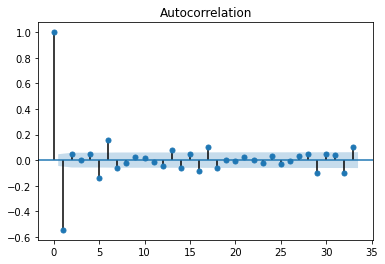

In [172]:
fig_sec = plot_acf(eth_df['Second Difference'].dropna());

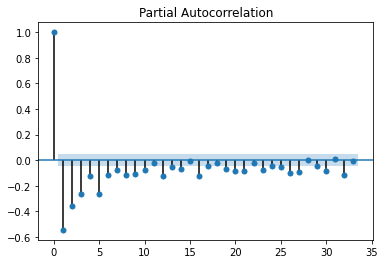

In [174]:
plot_pacf(eth_df['Second Difference'].dropna());

In [175]:
from statsmodels.tsa.arima_model import ARIMA

In [176]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

In [178]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.6369264056008337
p-Value : 0.08560293118048617
# of lags : 12
Num of Observations : 131
weak evidence against null hypothesis (accepted or fail to reject)
Data does have a unit root and is not stationary


In [182]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds Per Cow'], order=(0,1,0), seasonal_order=(1,1,1,12));

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [183]:
m_results = model.fit()

In [184]:
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:               Milk in Pounds Per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Wed, 30 Nov 2022   AIC                           1074.131
Time:                                      20:25:53   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102     -5.762      0.000      -0.785      -0.387
sigma2        55.5118      5.356     10.365      0.000      45.015      66.009
===================================================================================
Ljung-Box (Q):                       33.48   Jarque-Bera (JB):                32.04
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.77
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [185]:
m_results.resid

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
                 ...    
1975-08-01      2.641352
1975-09-01      8.158628
1975-10-01      7.676815
1975-11-01      6.572470
1975-12-01      5.936378
Length: 168, dtype: float64

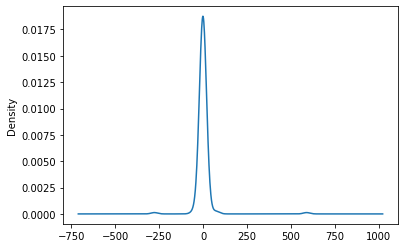

In [187]:
m_results.resid.plot(kind='kde');

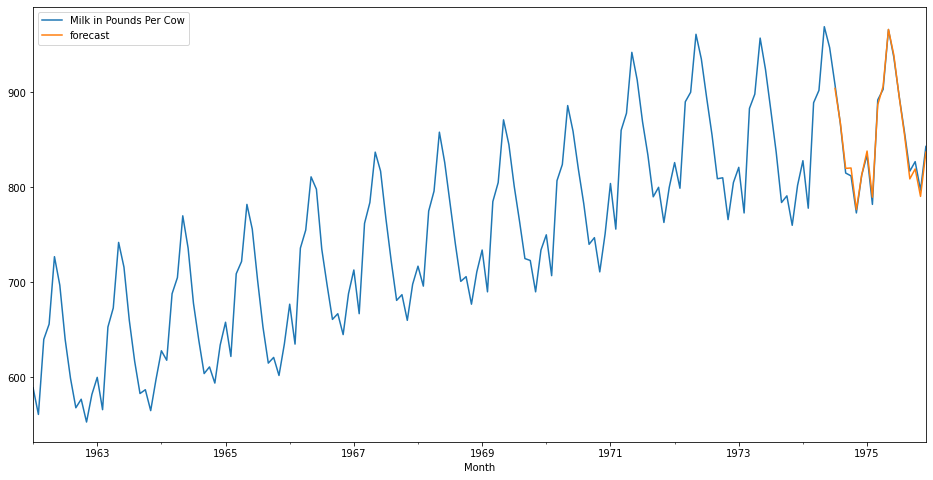

In [188]:
df['forecast'] = m_results.predict(start=150, end=168)
df[['Milk in Pounds Per Cow','forecast']].plot(figsize=(16,8))

In [189]:
df.tail()

,Milk in Pounds Per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,Seasonal Second Difference,forecast
Month,,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,-39.0,-87.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,-29.0,-85.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,-6.0,-46.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,11.0,-8.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,19.0,5.0,837.063622


In [190]:
from pandas.tseries.offsets import DateOffset